# Decision Tree Regressor Implementation

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# California Housing Data
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [6]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [7]:
# Independent and dependent feature. 
X = pd.DataFrame(california_df.data,columns=california_df.feature_names)
y = california_df.target

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
import seaborn as sns

<Axes: >

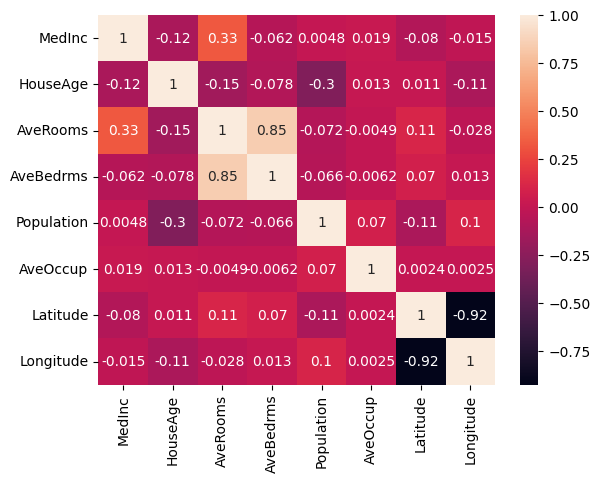

In [14]:
sns.heatmap(X.corr(),annot=True)

In [15]:
# Train Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [17]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [19]:
regressor

DecisionTreeRegressor()

In [20]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
y_pred

array([0.487  , 0.661  , 5.00001, ..., 1.292  , 1.389  , 4.25   ],
      shape=(6812,))

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.590654513981056


In [27]:
# Hyperparameter Tunning
parameter = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'], 
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12], 
    'max_features':['auto','sqrt','log2']
    
}
regressor = DecisionTreeRegressor()

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV 
regressorcv = GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [31]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [30]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
y_pred2= regressorcv.predict(X_test)

In [33]:
r2_score(y_test,y_pred2)

0.6673853689272913